In [688]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline

In [689]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [690]:
passengerId = test["PassengerId"]

In [691]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [692]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [693]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [694]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
663,664,0,3,"Coleff, Mr. Peju",male,36.0,0,0,349210,7.4958,NaN,S
329,330,1,1,"Hippach, Miss. Jean Gertrude",female,16.0,0,1,111361,57.9792,B18,C
190,191,1,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S
739,740,0,3,"Nankoff, Mr. Minko",male,NaN,0,0,349218,7.8958,NaN,S
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S


In [695]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


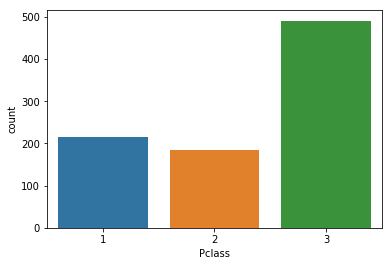

In [696]:
sns.countplot('Pclass',data=train)

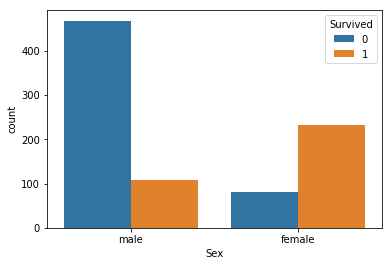

In [697]:
sns.countplot('Sex',hue='Survived', data=train)

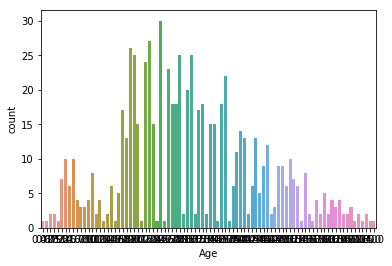

In [698]:
sns.countplot('Age',data=train)

In [699]:
plt.show()


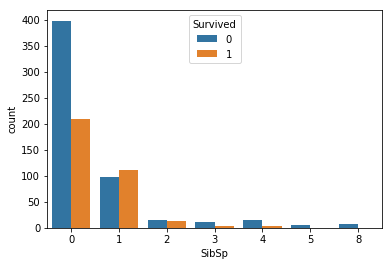

In [700]:
sns.countplot('SibSp', hue='Survived',data=train)

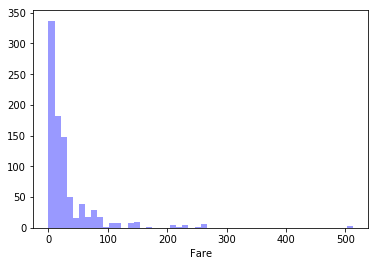

In [701]:
sns.distplot(train['Fare'].dropna(), kde = False,color='b')#kde : bool, optional #控制是否显示核密度估计图

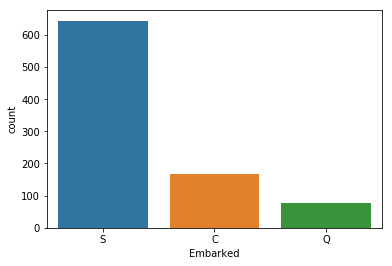

In [702]:
sns.countplot('Embarked', data = train)

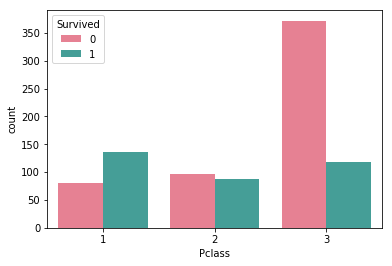

In [703]:
#看看各个因素与survuce的关系
sns.countplot('Pclass',hue='Survived',data=train,palette='husl')

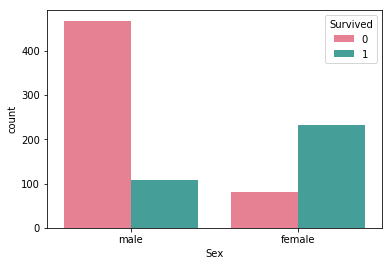

In [704]:
sns.countplot('Sex',hue='Survived',data=train,palette='husl')

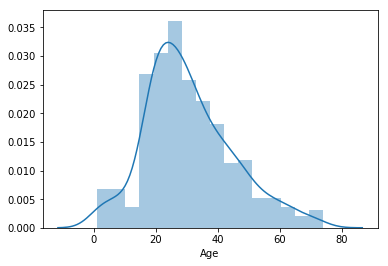

In [705]:
sns.distplot(train[train['Survived'] == 0]['Age'].dropna())

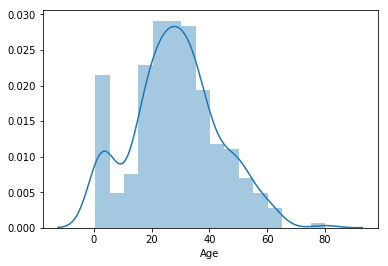

In [706]:
sns.distplot(train[train['Survived'] == 1]['Age'].dropna())

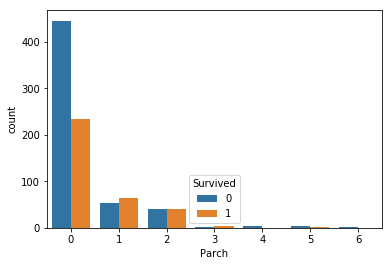

In [707]:
sns.countplot('Parch', hue='Survived', data=train)

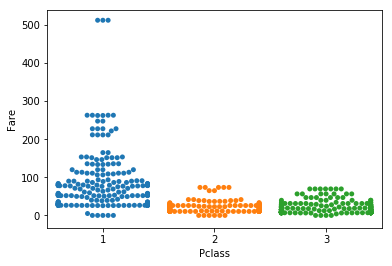

In [708]:
sns.swarmplot(x = 'Pclass', y = 'Fare',data=train)

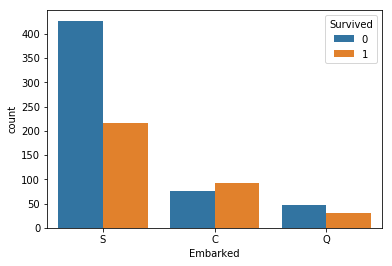

In [709]:
sns.countplot('Embarked',hue = 'Survived',data=train)

In [710]:
#检测异常值,补全空值

def detect_outliers(df,n,features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col],25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index     
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = pd.DataFrame({'value':outlier_indices, 'time':[1]*len(outlier_indices)})
    outlier_indices = outlier_indices.groupby('value').sum()
    tmp = outlier_indices.to_dict()
    multiple_outliers = list( k for k, v in tmp['time'].items() if v > n )
    return multiple_outliers


In [711]:
Outliers_to_drop = detect_outliers(train,2,["Age","SibSp","Parch","Fare"])

/home/harold/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [712]:
Outliers_to_drop

[27, 88, 159, 180, 201, 324, 341, 792, 846, 863]

In [713]:
train = train.drop(Outliers_to_drop,axis=0).reset_index(drop=True)

In [714]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [715]:
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 12 columns):
PassengerId    881 non-null int64
Survived       881 non-null int64
Pclass         881 non-null int64
Name           881 non-null object
Sex            881 non-null object
Age            711 non-null float64
SibSp          881 non-null int64
Parch          881 non-null int64
Ticket         881 non-null object
Fare           881 non-null float64
Cabin          201 non-null object
Embarked       879 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 82.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [716]:
full_data = [train,test]

In [717]:
Survival = train['Survived']

In [718]:
Survival.describe()

count    881.000000
mean       0.385925
std        0.487090
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

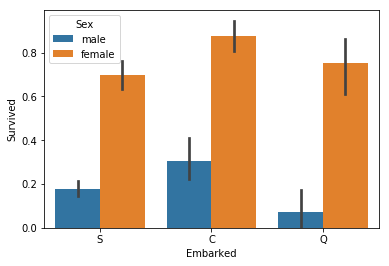

In [719]:
sns.barplot(x='Embarked',y = 'Survived', data=train, hue='Sex')

In [720]:
for dataset in full_data:
    dataset['Name_length'] = train['Name'].apply(len)

In [721]:
sum_Name = train[['Name_length','Survived']].groupby(['Name_length'],as_index = False).sum()

In [722]:
average_Name = train[["Name_length", "Survived"]].groupby(['Name_length'],as_index=False).mean()

In [723]:
average_Name.head()

,Name_length,Survived
0,12,0.500000
1,13,0.500000
2,14,0.333333
3,15,0.133333
4,16,0.230769


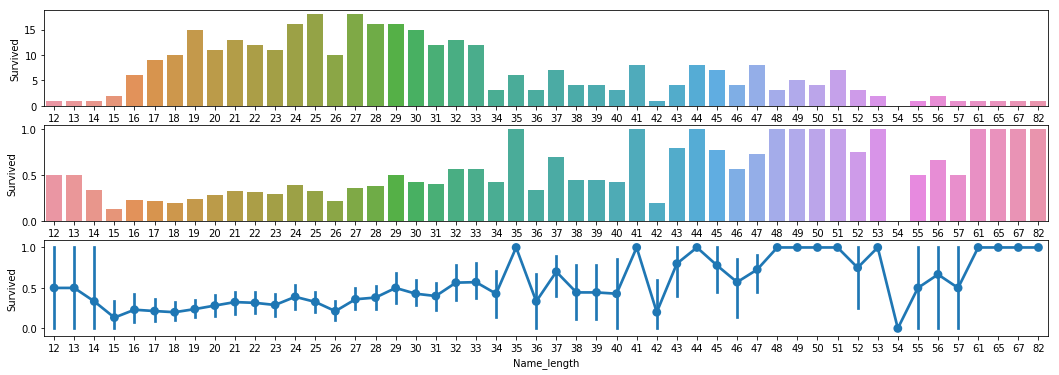

In [724]:
fig, (axis1,axis2,axis3) = plt.subplots(3,1,figsize=(18,6))
sns.barplot(x='Name_length', y='Survived', data=sum_Name, ax = axis1)
sns.barplot(x='Name_length', y='Survived', data=average_Name, ax = axis2)
sns.pointplot(x = 'Name_length', y = 'Survived', data=train, ax = axis3)

In [725]:
for dataset in full_data:
    dataset.loc[ dataset['Name_length'] <= 23, 'Name_length'] = 0
    dataset.loc[(dataset['Name_length'] > 23) & (dataset['Name_length'] <= 28), 'Name_length']  = 1
    dataset.loc[(dataset['Name_length'] > 28) & (dataset['Name_length'] <= 40), 'Name_length']  = 2
    dataset.loc[ dataset['Name_length'] > 40, 'Name_length']= 3

In [726]:
train['Name_length'].value_counts()

0    358
1    235
2    198
3     90
Name: Name_length, dtype: int64

In [727]:
for dataset in full_data:# Mapping Gender
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)    

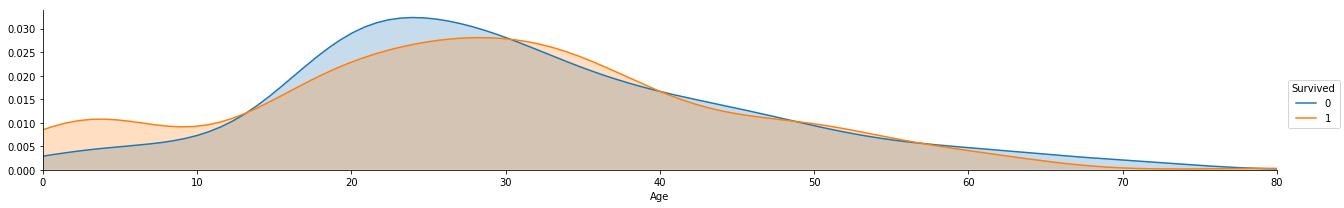

In [728]:
a = sns.FacetGrid( train, hue = 'Survived', aspect=6 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , train['Age'].max()))
a.add_legend()

In [729]:
for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[dataset['Age'] <= 14, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 14) & (dataset['Age'] <= 30), 'Age']        = 5
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 40), 'Age']        = 1
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 50), 'Age']        = 3
    dataset.loc[(dataset['Age'] > 50) & (dataset['Age'] <= 60), 'Age']        = 2
    dataset.loc[ dataset['Age'] > 60, 'Age'] 							      = 4
train['Age'].value_counts()

/home/harold/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


5    421
1    221
3     97
0     78
2     42
4     22
Name: Age, dtype: int64

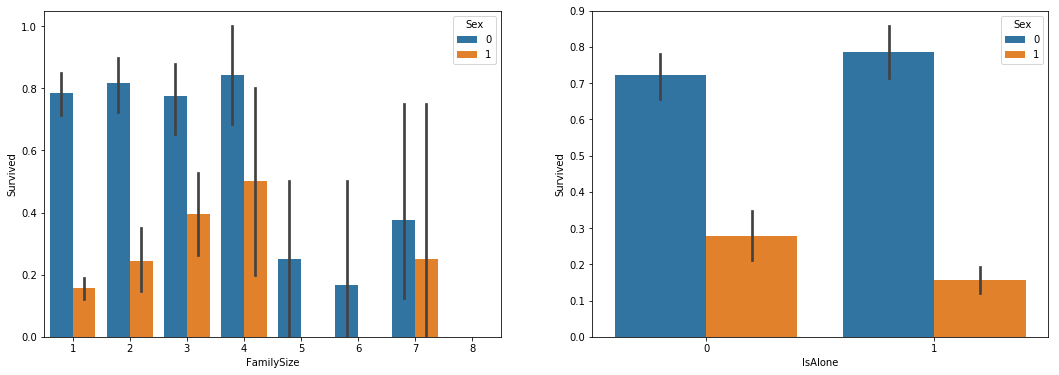

In [730]:
for dataset in full_data:
# Remove all NULLS in the Fare column and create a new feature Categorical Fare
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())
# Create new feature FamilySize as a combination of SibSp and Parch
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch']+1
# Create new feature IsAlone from FamilySize
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
# Create new feature Boys from FamilySize
    dataset['Boys'] = 0
    dataset.loc[(dataset['Age'] == 0) & (dataset['Sex']==1), 'Boys'] = 1
    
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(18,6))
sns.barplot(x="FamilySize", y="Survived", hue="Sex", data=train, ax = axis1);
sns.barplot(x="IsAlone", y="Survived", hue="Sex", data=train, ax = axis2);

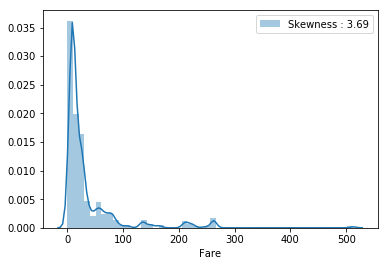

In [731]:
g = sns.distplot(dataset['Fare'],label='Skewness : %.2f'%(dataset['Fare'].skew()))
g.legend(loc = 'best')

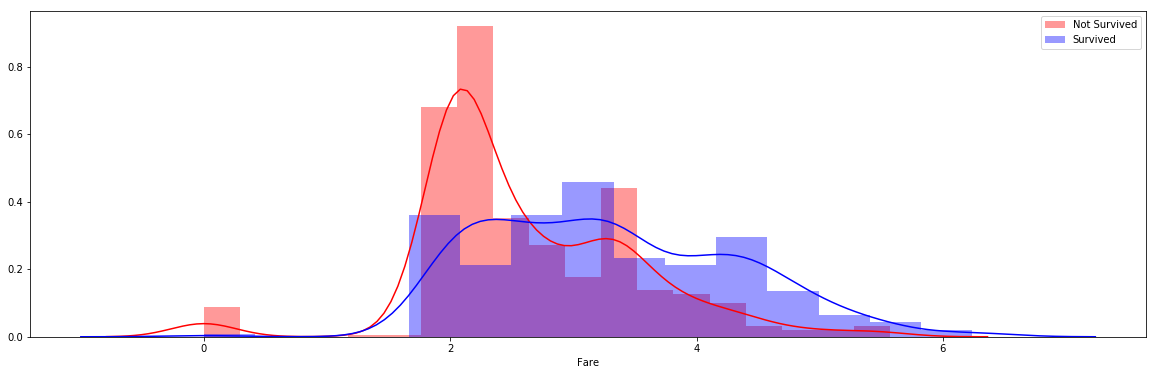

In [732]:
for dataset in full_data:
    dataset["Fare"] = dataset["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
a4_dims = (20, 6)
fig, ax = pyplot.subplots(figsize=a4_dims)
g = sns.distplot(train["Fare"][train["Survived"] == 0], color="r", label="Skewness : %.2f"%(train["Fare"].skew()), ax=ax)
g = sns.distplot(train["Fare"][train["Survived"] == 1], color="b", label="Skewness : %.2f"%(train["Fare"].skew()))
#g = g.legend(loc="best")
g = g.legend(["Not Survived","Survived"])

In [733]:
for dataset in full_data:
    dataset.loc[dataset['Fare'] <= 2.7,'Fare'] = 0
    dataset.loc[dataset['Fare'] > 2.7, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
train['Fare'].value_counts()

0    457
3    424
Name: Fare, dtype: int64

In [734]:
for dataset in full_data:
    dataset['Has_Cabin'] = dataset['Cabin'].apply(lambda x : 0 if type(x) == float else 1)
train[["Has_Cabin", "Survived"]].groupby(['Has_Cabin'], as_index=False).sum().sort_values(by='Survived', ascending=False)

,Has_Cabin,Survived
0,0,206
1,1,134


In [735]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 17 columns):
PassengerId    881 non-null int64
Survived       881 non-null int64
Pclass         881 non-null int64
Name           881 non-null object
Sex            881 non-null int64
Age            881 non-null int64
SibSp          881 non-null int64
Parch          881 non-null int64
Ticket         881 non-null object
Fare           881 non-null int64
Cabin          201 non-null object
Embarked       879 non-null object
Name_length    881 non-null int64
FamilySize     881 non-null int64
IsAlone        881 non-null int64
Boys           881 non-null int64
Has_Cabin      881 non-null int64
dtypes: int64(13), object(4)
memory usage: 117.1+ KB


In [736]:
train[["Has_Cabin", "Survived"]].groupby(['Has_Cabin'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Has_Cabin,Survived
1,1,0.666667
0,0,0.302941


In [737]:
train['Embarked'].value_counts()

S    634
C    168
Q     77
Name: Embarked, dtype: int64

In [738]:
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    dataset['Embarked'] = dataset['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)

In [739]:
train_pivot = pd.pivot_table(train, values='Survived', index=['Embarked'], columns='Pclass', aggfunc=np.mean, margins=True)

In [740]:
def color_negative_red(val):
    color = 'red' if val < 0.4 else 'black'
    return 'color: %s' % color
train_pivot = train_pivot.style.applymap(color_negative_red)

In [741]:
train_pivot

Pclass,1,2,3,All
Embarked,,,,
0,0.587302,0.463415,0.193642,0.341195
1,0.694118,0.529412,0.378788,0.553571
2,0.5,0.666667,0.375,0.38961
All,0.629108,0.472826,0.245868,0.385925


In [742]:
dataset['Embarked'] = dataset['Embarked'].replace(['0', '2'], '0')
train['Fare'].value_counts()

0    457
3    424
Name: Fare, dtype: int64

In [743]:
import re
def get_title(name):
    title_search = re.search('([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""
for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)

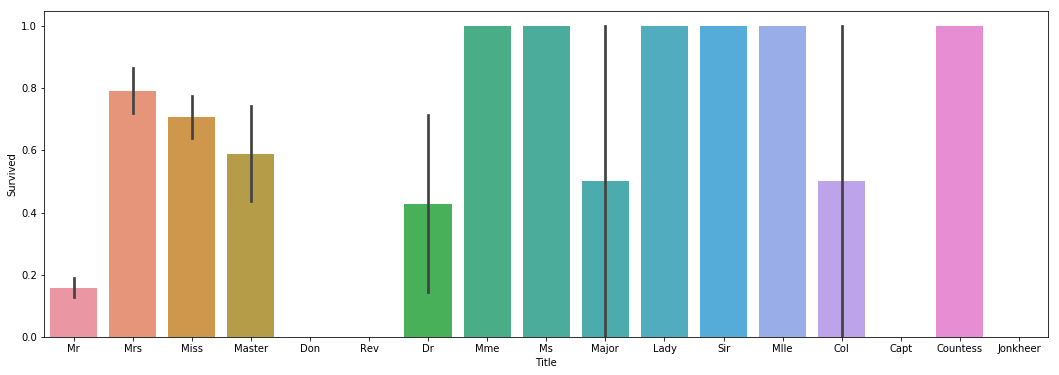

In [744]:
fig, (axis1) = plt.subplots(1, figsize = (18,6))
sns.barplot(x  = 'Title', y='Survived', data = train, ax=axis1);

In [745]:
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Mrs', 'Miss'], 'MM')
    dataset['Title'] = dataset['Title'].replace(['Dr', 'Major', 'Col'], 'DMC')
    dataset['Title'] = dataset['Title'].replace(['Don', 'Rev', 'Capt', 'Jonkheer'],'DRCJ')
    dataset['Title'] = dataset['Title'].replace(['Mme', 'Ms', 'Lady', 'Sir', 'Mlle', 'Countess'],'MMLSMC' )
# Mapping titles
    title_mapping = {"MM": 1, "Master":2, "Mr": 5, "DMC": 4, "DRCJ": 3, "MMLSMC": 0}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(3)

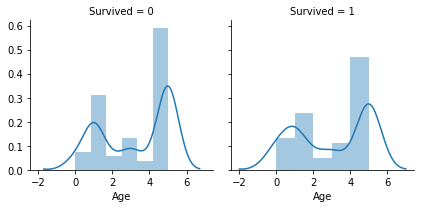

In [746]:
g = sns.FacetGrid(train, col='Survived')
g = g.map(sns.distplot, "Age")

In [747]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         0
Name_length      0
FamilySize       0
IsAlone          0
Boys             0
Has_Cabin        0
Title            0
dtype: int64

In [748]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Name_length      0
FamilySize       0
IsAlone          0
Boys             0
Has_Cabin        0
Title            0
dtype: int64

In [749]:
for dataset in full_data:
    dataset.drop('Cabin', inplace=True, axis=1)

In [750]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_length,FamilySize,IsAlone,Boys,Has_Cabin,Title
0,892,3,"Kelly, Mr. James",1,1,0,0,330911,0,2,0,1,1,0,0,5.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,3,1,0,363272,0,0,3,2,0,0,0,1.0
2,894,2,"Myles, Mr. Thomas Francis",1,4,0,0,240276,0,2,0,1,1,0,0,5.0
3,895,3,"Wirz, Mr. Albert",1,5,0,0,315154,0,0,3,1,1,0,0,5.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,5,1,1,3101298,0,0,1,3,0,0,0,1.0


In [751]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_length,FamilySize,IsAlone,Boys,Has_Cabin,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,5,1,0,A/5 21171,0,0,0,2,0,0,0,5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,0,PC 17599,3,1,3,2,0,0,1,1
2,3,1,3,"Heikkinen, Miss. Laina",0,5,0,0,STON/O2. 3101282,0,0,0,1,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,0,113803,3,0,3,2,0,0,1,1
4,5,0,3,"Allen, Mr. William Henry",1,1,0,0,373450,0,0,1,1,1,0,0,5


In [752]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_length,FamilySize,IsAlone,Boys,Has_Cabin,Title
count,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000
mean,446.713961,0.385925,2.307605,0.649262,3.165721,0.455165,0.363224,1.443814,0.365494,1.022701,1.818388,0.609535,0.044268,0.228150,3.423383
std,256.617021,0.487090,0.835055,0.477472,1.939366,0.871571,0.791839,1.499799,0.638100,1.019997,1.382086,0.488132,0.205806,0.419878,1.911413
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,226.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,448.000000,0.000000,3.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000
75%,668.000000,1.000000,3.000000,1.000000,5.000000,1.000000,0.000000,3.000000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,5.000000
max,891.000000,1.000000,3.000000,1.000000,5.000000,5.000000,6.000000,3.000000,2.000000,3.000000,8.000000,1.000000,1.000000,1.000000,5.000000


In [753]:
train[['Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked', 'Has_Cabin', 'FamilySize', 'Title', 'Survived']].groupby(['Survived'], as_index=False).mean().sort_values(by='Pclass', ascending=False)

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,Title
0,0,2.528651,0.855823,3.271719,0.304991,1.097967,0.312384,0.123845,1.757856,4.290203
1,1,1.955882,0.320588,2.997059,0.455882,1.994118,0.450000,0.394118,1.914706,2.044118


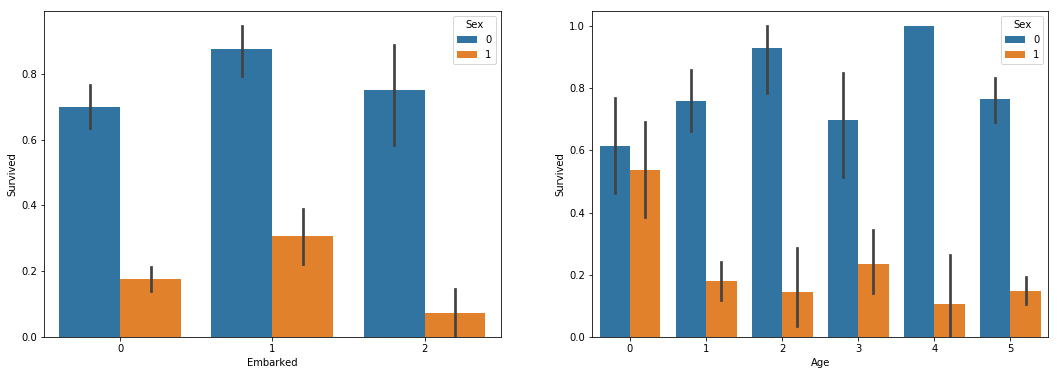

In [754]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(18,6))
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=train, ax = axis1);
sns.barplot(x="Age", y="Survived", hue="Sex", data=train, ax = axis2);

In [755]:
train[["FamilySize", "Survived"]].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.052632
7,8,0.000000


In [756]:
train_pivot = pd.pivot_table(train, values= 'Survived',index=['Title', 'Pclass'],columns='Sex',aggfunc=np.mean, margins=True)
def color_negative_red(val):
    # Takes a scalar and returns a string with the css property 'color: red' if below 0.4, black otherwise.
    color = 'red' if val < 0.4 else 'black'
    return 'color: %s' % color
train_pivot = train_pivot.style.applymap(color_negative_red)
train_pivot

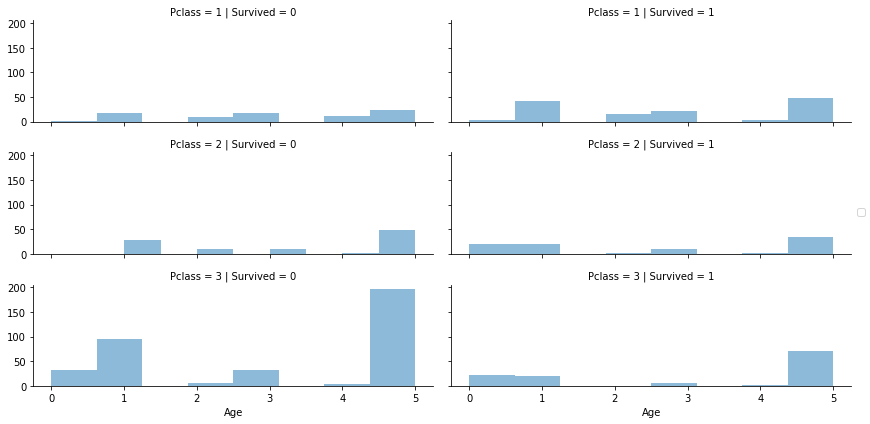

In [757]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2, aspect=3)
grid.map(plt.hist, 'Age', alpha=.5, bins=8)
grid.add_legend();

Text(0.5,1,'Pclass vs Family Size Survival Comparison')

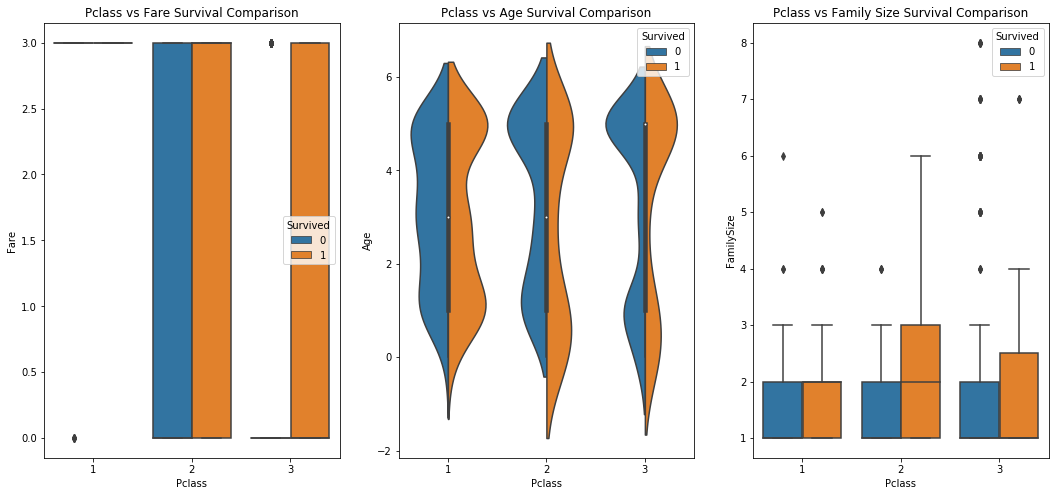

In [758]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(18,8))
sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = train, ax = axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = train, split = True, ax = axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x = 'Pclass', y ='FamilySize', hue = 'Survived', data = train, ax = axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')

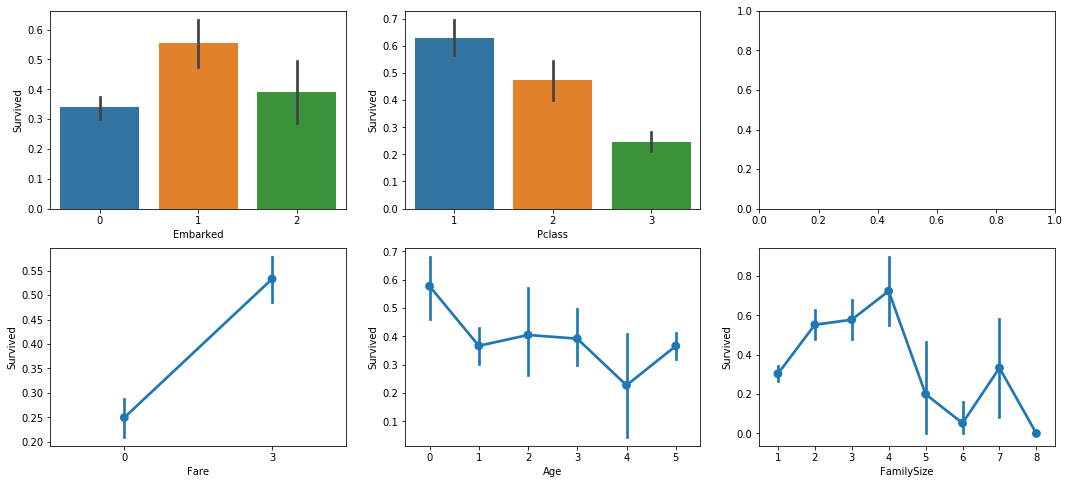

In [759]:
fig, saxis = plt.subplots(2, 3,figsize=(18,8))

sns.barplot(x = 'Embarked', y = 'Survived', data=train, ax = saxis[0,0])
sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=train, ax = saxis[0,1])
sns.pointplot(x = 'Fare', y = 'Survived',  data=train, ax = saxis[1,0])
sns.pointplot(x = 'Age', y = 'Survived',  data=train, ax = saxis[1,1])
sns.pointplot(x = 'FamilySize', y = 'Survived', data=train, ax = saxis[1,2])

/home/harold/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/harold/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


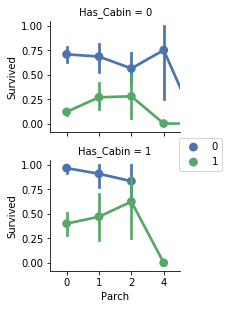

In [760]:
grid = sns.FacetGrid(train, row='Has_Cabin', size=2.2, aspect=1.2)
grid.map(sns.pointplot, 'Parch', 'Survived', 'Sex', palette='deep')
grid.add_legend()

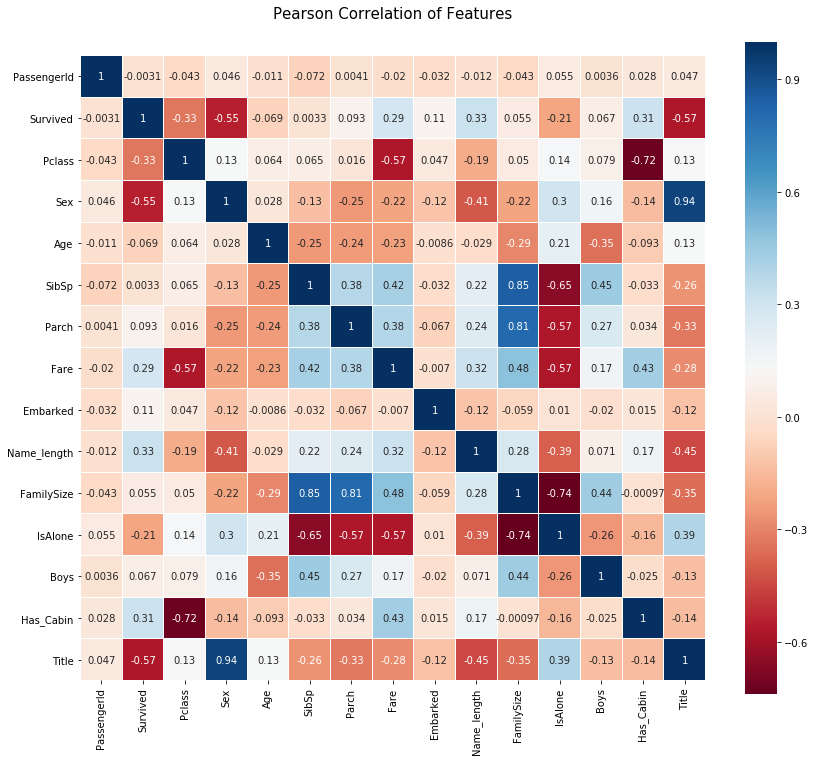

In [761]:
drop_elements = ['Name','Ticket']
train = train.drop(drop_elements, axis = 1)
test  = test.drop(drop_elements, axis = 1)
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [762]:
passengerId = test["PassengerId"]
drop_elements = ['PassengerId', 'Boys', 'IsAlone', 'Embarked', 'Has_Cabin','Parch']
train = train.drop(drop_elements, axis = 1)
test  = test.drop(drop_elements, axis = 1)

/home/harold/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/home/harold/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/harold/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


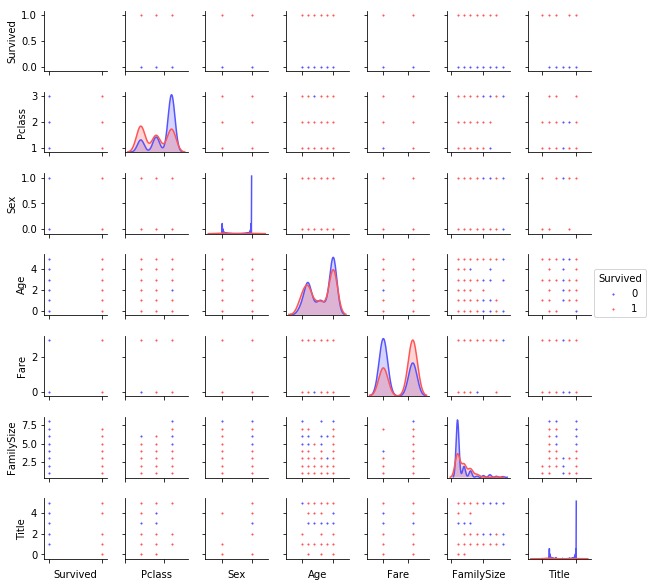

In [763]:
g = sns.pairplot(train[[u'Survived', u'Pclass', u'Sex', u'Age', u'Fare',
       u'FamilySize', u'Title']], hue='Survived', palette = 'seismic',size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

In [764]:
x_train = train.drop("Survived", axis=1)
y_train = train["Survived"]
x_train.shape,y_train.shape, test.shape

((881, 8), (881,), (418, 8))

In [765]:
X_test = test.copy()

In [766]:
import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier)
from sklearn.cross_validation import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.preprocessing import StandardScaler

In [767]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
acc_log = round(logreg.score(x_train, y_train) * 100,2)

In [768]:
acc_log

81.95

In [769]:
LogisticRegression.score?

In [772]:
svc = SVC()
svc.fit(x_train, y_train)
acc_svc = round(svc.score(x_train, y_train)*100,2)
svc_predictions = svc.predict(X_test)
test_Survived = pd.Series(svc_predictions, name="Survived")
Submission1 = pd.concat([passengerId,test_Survived],axis=1)

In [773]:
acc_svc

85.02

In [776]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=26, metric='minkowski',metric_params=None, n_jobs=1, n_neighbors=6, p=2, 
                           weights='uniform')
knn.fit(x_train, y_train)
acc_knn = round(knn.score(x_train, y_train) *100 ,2)
acc_knn

83.88

In [777]:
knn_predictions = knn.predict(X_test)
test_Survived = pd.Series(knn_predictions, name="Survived")
Submission2 = pd.concat([passengerId,test_Survived],axis=1)

In [797]:
gaussian = GaussianNB()
gaussian.fit(x_train,y_train)
acc_gaussian = round(gaussian.score(x_train,y_train)*100,2)

In [798]:
acc_gaussian

81.38

In [782]:
perceptron = Perceptron()
perceptron.fit(x_train, y_train)
acc_perceptron = round(perceptron.score(x_train, y_train) * 100, 2)
acc_perceptron

/home/harold/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


77.53

In [784]:
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 2)
acc_linear_svc

81.5

In [785]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
acc_sgd = round(sgd.score(x_train, y_train) * 100, 2)
acc_sgd



/home/harold/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


77.07

In [787]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

88.2

In [788]:
tree_predictions = decision_tree.predict(X_test)
test_Survived = pd.Series(tree_predictions, name = "Survived")
Submission3 = pd.concat([passengerId,test_Survived],axis=1)

In [791]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100,2)

In [792]:
acc_random_forest

88.2

In [794]:
random_forest_predictions = random_forest.predict(X_test)
test_Survived = pd.Series(random_forest_predictions, name="Survived")
Submission4 = pd.concat([passengerId,test_Survived],axis=1)
Submission4.head(15)

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


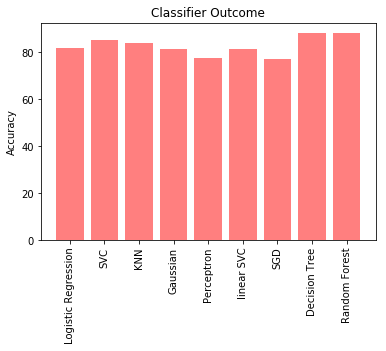

In [799]:
objects = ('Logistic Regression', 'SVC', 'KNN', 'Gaussian', 'Perceptron', 'linear SVC', 'SGD', 'Decision Tree', 'Random Forest')
x_pos = np.arange(len(objects))
accuracies1 = [acc_log, acc_svc, acc_knn, acc_gaussian, acc_perceptron, acc_linear_svc, acc_sgd, acc_decision_tree, acc_random_forest]
    
plt.bar(x_pos, accuracies1, align='center', alpha=0.5, color='r')
plt.xticks(x_pos, objects, rotation='vertical')
plt.ylabel('Accuracy')
plt.title('Classifier Outcome')
plt.show()

In [802]:
Submission1.to_csv('./sub1.csv',index=False)

In [803]:
Submission2.to_csv('./sub2.csv')

In [808]:
Submission3.to_csv('./sub3.csv',index=False)

In [807]:
Submission4.to_csv('./sub4.csv',index=False)